Silhouette Score: 0.9999501283730031


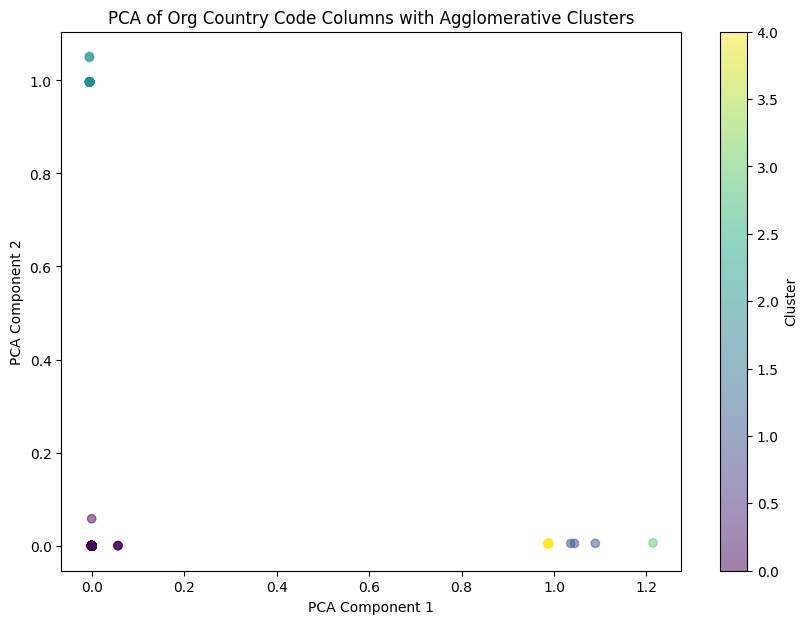

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Load the normalized dataset
df = pd.read_csv('normalized_investor_uuid_org_country_code_sums.csv')

# Extract the features for clustering
features = df.drop(columns=['investor_uuid'])

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(features)

# Run Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=5)
clusters = agg_clustering.fit_predict(pca_transformed)

# Add the cluster labels to the DataFrame
df['cluster'] = clusters

# Evaluate the clustering result using silhouette score
silhouette_avg = silhouette_score(pca_transformed, clusters)
print(f'Silhouette Score: {silhouette_avg}')

# Plot the clustering result
plt.figure(figsize=(10, 7))
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Org Country Code Columns with Agglomerative Clusters')
plt.colorbar(label='Cluster')
plt.show()